# Loan Prediction.....

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


import warnings
warnings.filterwarnings("ignore")

# first we will see the datset and then imports all the  libarays which  are needed..

In [2]:
data = pd.read_csv("train.csv")

## Now we will read the dataset 

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 43.2+ KB


## data.info() will provide us the proper entry in the coloumn and also the datatype used for entrty so we can go for further calculations

In [5]:
data.shape

(614, 13)

### shape function provide us the number of coloumns and all hightest no of entries

### Now we go forn the EDA or Data Cleaning 
### First and the most get the missing and removing them...

In [6]:
data.apply(lambda x: sum(x.isnull()),axis=0) 

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### There are different ways to find the null values in your file is, I am using
### 1. using the normal isnull function     2. Using the lamda function and the putting the isnull function.also while getting the missing value its  good to get the percentage of the missing values in the columns.There are some rules or we can say point we can use while takinge or selecting the coloumn for the EDA,that is the column have missing value percent more then 40% - 50%  so,we should drop that column. But,Sometime the column that is important we cant drop that column

In [8]:
data.isnull().sum()/len(data)*100

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [9]:
data['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [10]:
data.Gender = data.Gender.fillna('Male')

In [11]:
data['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [12]:
data.Married = data.Married.fillna('Yes')

In [13]:
data['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [14]:
data.Dependents = data.Dependents.fillna('0')

In [15]:
data['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [16]:
data.Self_Employed = data.Self_Employed.fillna('No')

In [17]:
data.LoanAmount = data.LoanAmount.fillna(data.LoanAmount.mean())

In [18]:
data['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [19]:
data.Loan_Amount_Term = data.Loan_Amount_Term.fillna(360.0)

In [20]:
data['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [21]:
data.Credit_History = data.Credit_History.fillna(1.0)

#### There are different ways for filling the the missing values in the coloumn such as Mean,Median,Mode knn clutstering etc. There are manys ways to fill the missing values so i am using the Mode method for filling the values
#### Mode method is just as the value which occur most of the multiple time or maximum time which is repeated
#### So we have fill the columns which have the missing values and we will again check is there any value or column left which have missing value


In [22]:
data.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [23]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [24]:
data['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [25]:
data['Dependents'].unique()

array(['0', '1', '2', '3+'], dtype=object)

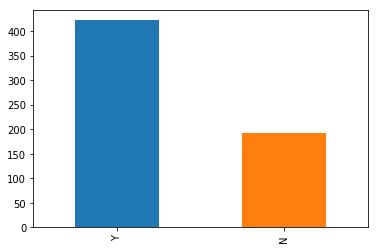

In [26]:
%matplotlib inline
data['Loan_Status'].value_counts().plot('bar')

In [27]:
data.groupby('Loan_Status').mean()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Loan_Status,,,,,
N,5446.078125,1877.807292,150.945488,344.56250,0.572917
Y,5384.068720,1504.516398,144.349606,341.43128,0.983412


In [28]:
data['Credit_History'].unique()

array([1., 0.])

In [29]:
pd.crosstab(data.Loan_Status,data.Credit_History, normalize=True)

Credit_History,0.0,1.0
Loan_Status,,
N,0.133550,0.179153
Y,0.011401,0.675896


### 67 % of customers how take loan  they  have credit history,so we can say there can be chance that they would have taken the loan for clearing the credit card bills.

In [30]:
pd.crosstab(data.Loan_Status,data.Credit_History, normalize='columns')

Credit_History,0.0,1.0
Loan_Status,,
N,0.921348,0.209524
Y,0.078652,0.790476


### so as we have thought the the person how have credit history will take loan so its around  80 %, which means that the person how have credit history will take loan significantly.....

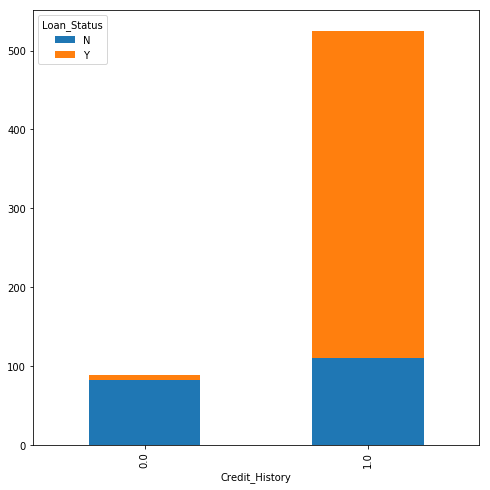

In [31]:
pd.crosstab(index=data["Credit_History"], columns=data["Loan_Status"]).plot(kind="bar",figsize=(8,8),stacked=True)

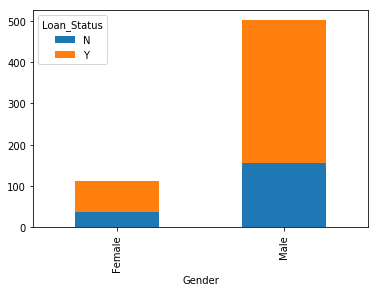

In [32]:
pd.crosstab(data.Gender,data.Loan_Status).plot(kind='bar',stacked=True)

In [33]:
pd.crosstab(data.Gender,data.Loan_Status,normalize='index')

Loan_Status,N,Y
Gender,,
Female,0.330357,0.669643
Male,0.308765,0.691235


In [34]:
data['Gender'].value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

### Now thinking from the point of view as the gender we got to know that about 80 % of customers are male and 20% Females so there can be different percentage of loan takenby male and female...

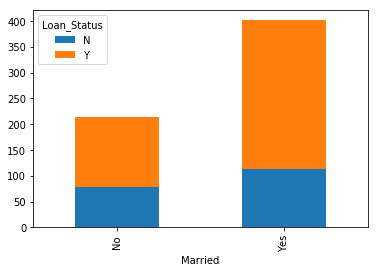

In [35]:
pd.crosstab(data.Married,data.Loan_Status).plot(kind='bar',stacked=True)

In [36]:
pd.crosstab(data.Married,data.Loan_Status,normalize='index')

Loan_Status,N,Y
Married,,
No,0.370892,0.629108
Yes,0.281796,0.718204


## From the graph we can see that married percentage is around 50 % of customer and in married customers have more chance for taking the loan from the number we can say they have 10% more chance of taking the loan.

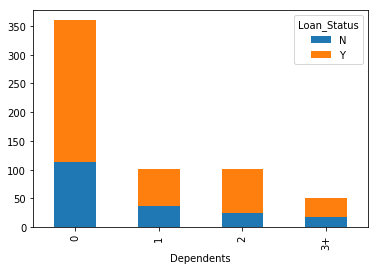

In [37]:
pd.crosstab(data.Dependents,data.Loan_Status).plot(kind='bar',stacked=True)

In [38]:
pd.crosstab(data.Dependents,data.Loan_Status,normalize='index')

Loan_Status,N,Y
Dependents,,
0,0.313889,0.686111
1,0.352941,0.647059
2,0.247525,0.752475
3+,0.352941,0.647059


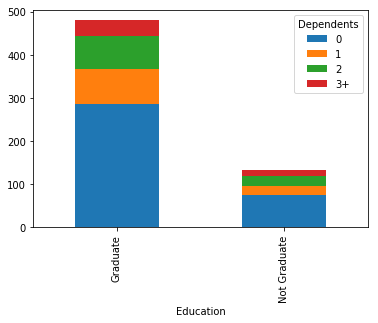

In [39]:
pd.crosstab(data.Education,data.Dependents).plot(kind='bar',stacked=True)

### In the above condition I have test the relation check  between there education and dependents
###  From the above representastion we can see that bank does not give any speacial consideration or attenstion (1 or 3+)dependents ,but give to customers that have (0 or 2) Dependents. we can't say why this consideration is there....

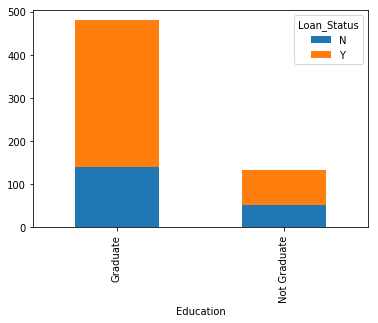

In [40]:
pd.crosstab(data.Education,data.Loan_Status).plot(kind='bar',stacked=True)

In [41]:
pd.crosstab(data.Education,data.Loan_Status,normalize='index')

Loan_Status,N,Y
Education,,
Graduate,0.291667,0.708333
Not Graduate,0.388060,0.611940


## IN The above we have done the relation of the customers of what the eductaion they own and thus it have any effects on there loan status...
## So we have seen that  customers who are  graduate, has 10 % more chance to take loan  than not gratudate to take loan...

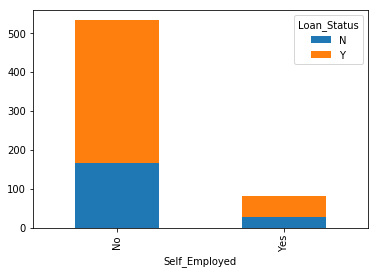

In [42]:
pd.crosstab(data.Self_Employed,data.Loan_Status).plot(kind='bar',stacked=True)

In [43]:
pd.crosstab(data.Self_Employed,data.Loan_Status,normalize='index')

Loan_Status,N,Y
Self_Employed,,
No,0.312030,0.687970
Yes,0.317073,0.682927


### IN The above we have done the relation of the customers who are self employed and thus it have any effects on there loan status...
### So we have seen that customers who are not self employed , has 10 % more chance to take loan than the self employed  to take loan...

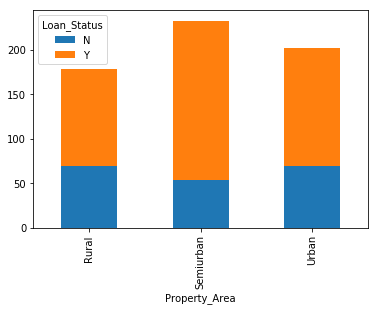

In [44]:
pd.crosstab(data.Property_Area,data.Loan_Status).plot(kind='bar',stacked=True)

In [45]:
pd.crosstab(data.Loan_Status,data.Property_Area,normalize='columns')

Property_Area,Rural,Semiurban,Urban
Loan_Status,,,
N,0.385475,0.23176,0.341584
Y,0.614525,0.76824,0.658416


###  In the above we have  check the relation of loan status with the Property area the belongs.so we get to know that yes there is different percent values of different Property areas...


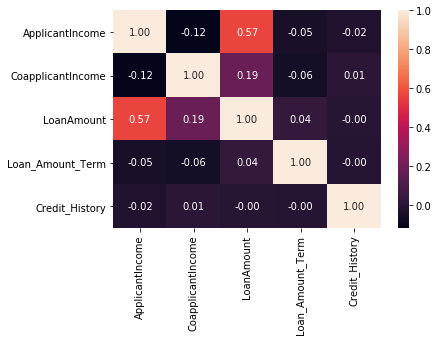

In [46]:
sns.heatmap(data.corr(), annot=True, fmt=".2f")
plt.show()

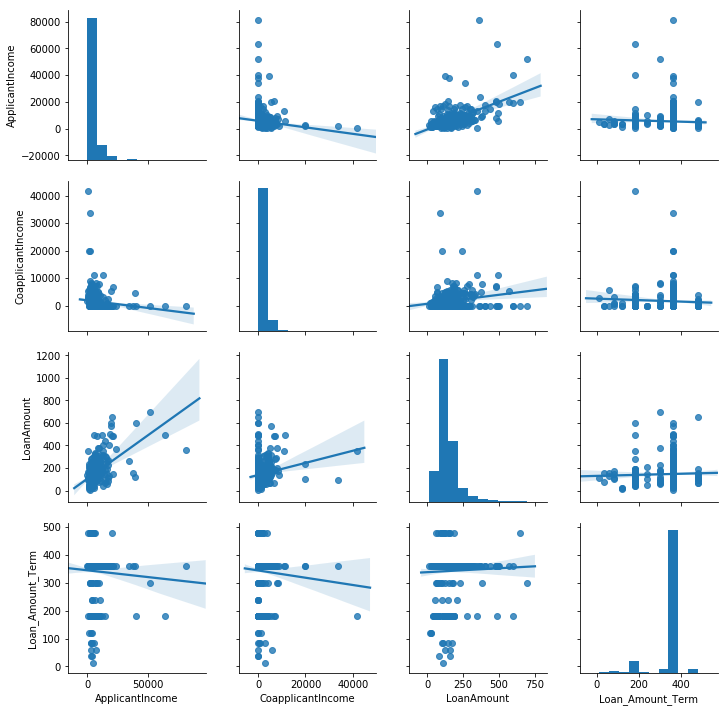

In [47]:
sns.pairplot(data[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']].dropna(),kind="reg")

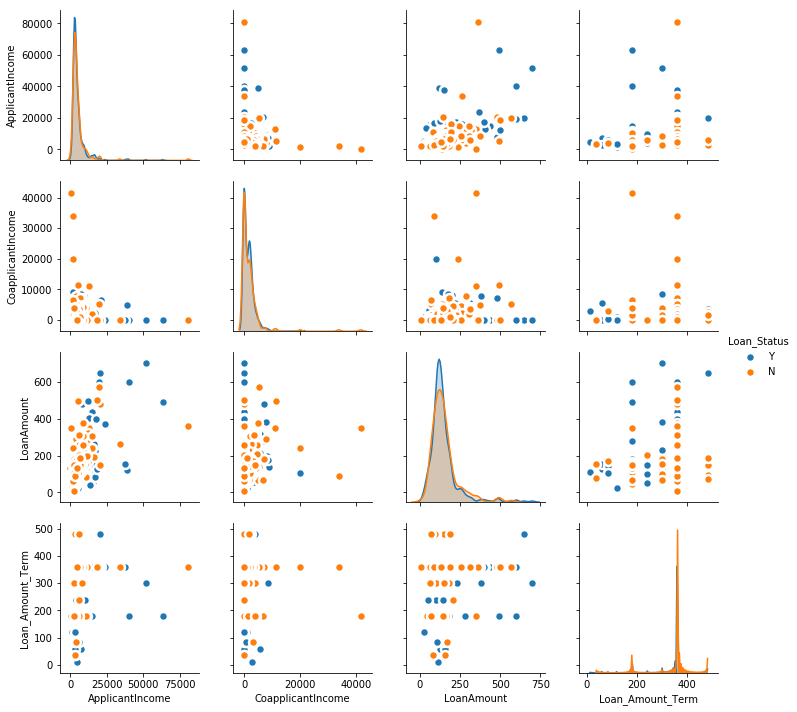

In [48]:
sns.pairplot(data[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Loan_Status']].dropna(), kind="scatter", hue="Loan_Status", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

## Above we have done different graphs to check the relation of each column with  other columns.we got the result such as
## 1- Applicant income and coapplicant income looks have some similarities, so we could add both together as total income
## 2- we could figure out classification boundries between variables, as ex: loan(Y):income >0 and <=2500 ,also loan amount >0 and  <450
## 3 All numarical variables in histograms(alone) do not show any groups separations between loan status(y,n)        

In [49]:
 data['total_income'] = data['ApplicantIncome'] + data['CoapplicantIncome']

## Now we are doing Boxplot which is one of the best way to check outliers

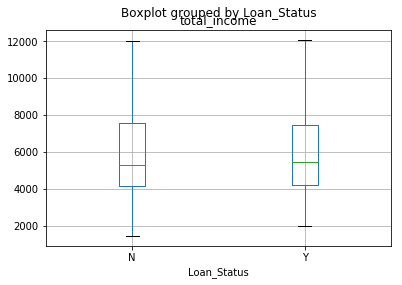

In [50]:
data.boxplot(column='total_income', by='Loan_Status',showfliers=False)

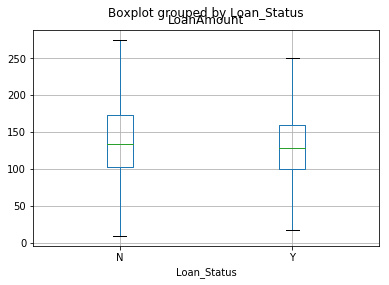

In [53]:
data.boxplot(column='LoanAmount', by='Loan_Status',showfliers=False)

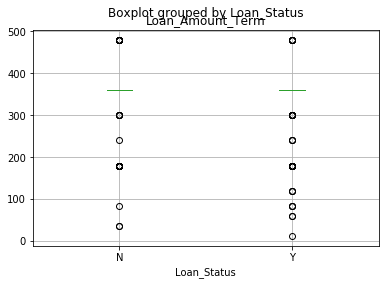

In [54]:
data.boxplot(column='Loan_Amount_Term', by='Loan_Status')

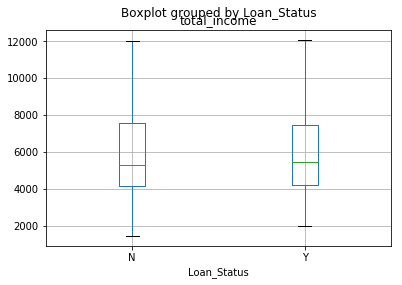

In [55]:
data.boxplot(column='total_income', by='Loan_Status',showfliers=False)

# Modeling our train data

In [56]:
cat_vars=['Dependents','Gender','Married','Education','Self_Employed','Property_Area','Credit_History']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1=data.join(cat_list)
    data=data1
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [57]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg,5)

data=data[to_keep].dropna()
data_X=data.drop(['Loan_Status','Loan_ID'],axis=1)
data_y=data['Loan_Status']

In [58]:
data_X.isnull().sum()

ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
total_income               0
Dependents_0               0
Dependents_1               0
Dependents_2               0
Dependents_3+              0
Gender_Female              0
Gender_Male                0
Married_No                 0
Married_Yes                0
Education_Graduate         0
Education_Not Graduate     0
Self_Employed_No           0
Self_Employed_Yes          0
Property_Area_Rural        0
Property_Area_Semiurban    0
Property_Area_Urban        0
Credit_History_0.0         0
Credit_History_1.0         0
dtype: int64

In [59]:
data_X.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'total_income', 'Dependents_0', 'Dependents_1',
       'Dependents_2', 'Dependents_3+', 'Gender_Female', 'Gender_Male',
       'Married_No', 'Married_Yes', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban', 'Property_Area_Urban',
       'Credit_History_0.0', 'Credit_History_1.0'],
      dtype='object')

In [60]:
rfe = rfe.fit(data_X, data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[False False False False False False  True False False False False  True
 False False False False False False  True False  True  True]
[17 16 14 15 18 13  1  4 11 12  7  1  6 10  2  9  8  3  1  5  1  1]


## Logistc Regression 

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\saddam\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [62]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.83


In [63]:
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
print(classification_report(y_test, y_pred)) 

[[ 22  29]
 [  2 132]]
             precision    recall  f1-score   support

          N       0.92      0.43      0.59        51
          Y       0.82      0.99      0.89       134

avg / total       0.85      0.83      0.81       185



## Regression Iteration 2

In [64]:
data_X2=data_X.drop(['Self_Employed_No','Self_Employed_Yes','Gender_Female','Gender_Male'],axis=1)

In [65]:
data_X2.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'total_income', 'Dependents_0', 'Dependents_1',
       'Dependents_2', 'Dependents_3+', 'Married_No', 'Married_Yes',
       'Education_Graduate', 'Education_Not Graduate', 'Property_Area_Rural',
       'Property_Area_Semiurban', 'Property_Area_Urban', 'Credit_History_0.0',
       'Credit_History_1.0'],
      dtype='object')

In [66]:
X_train, X_test, y_train, y_test = train_test_split(data_X2, data_y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.83


In [68]:
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
print(classification_report(y_test, y_pred)) 

[[ 22  29]
 [  2 132]]
             precision    recall  f1-score   support

          N       0.92      0.43      0.59        51
          Y       0.82      0.99      0.89       134

avg / total       0.85      0.83      0.81       185



In [69]:
loanDf=data
data_X2['total_income']=data_X2['ApplicantIncome']+data_X2['CoapplicantIncome']

In [70]:
loanDf.columns

Index(['Loan_ID', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Loan_Status', 'total_income', 'Dependents_0',
       'Dependents_1', 'Dependents_2', 'Dependents_3+', 'Gender_Female',
       'Gender_Male', 'Married_No', 'Married_Yes', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban', 'Property_Area_Urban',
       'Credit_History_0.0', 'Credit_History_1.0'],
      dtype='object')

No handles with labels found to put in legend.


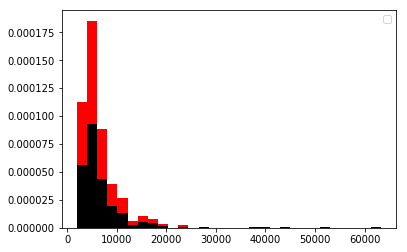

In [71]:
loanDf['total_income']=loanDf['ApplicantIncome']+loanDf['CoapplicantIncome']
take_loan=list(loanDf[loanDf['Loan_Status']=='Y']['total_income'])
not_take_loan=list(loanDf[loanDf['Loan_Status']=='Y']['total_income'])
colors = ['black', 'red']
plt.hist([take_loan,not_take_loan], 30,stacked=True,color=colors,normed=True)
plt.legend()

In [72]:
X_train, X_test, y_train, y_test = train_test_split(data_X2.drop(['ApplicantIncome','CoapplicantIncome'],axis=1), data_y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.83


In [73]:
data_X2.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'total_income', 'Dependents_0', 'Dependents_1',
       'Dependents_2', 'Dependents_3+', 'Married_No', 'Married_Yes',
       'Education_Graduate', 'Education_Not Graduate', 'Property_Area_Rural',
       'Property_Area_Semiurban', 'Property_Area_Urban', 'Credit_History_0.0',
       'Credit_History_1.0'],
      dtype='object')

In [74]:
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
print(classification_report(y_test, y_pred))

[[ 21  30]
 [  2 132]]
             precision    recall  f1-score   support

          N       0.91      0.41      0.57        51
          Y       0.81      0.99      0.89       134

avg / total       0.84      0.83      0.80       185



## Feature Selection

#  Chi-Squared

In [75]:
data_X.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'total_income', 'Dependents_0', 'Dependents_1',
       'Dependents_2', 'Dependents_3+', 'Gender_Female', 'Gender_Male',
       'Married_No', 'Married_Yes', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban', 'Property_Area_Urban',
       'Credit_History_0.0', 'Credit_History_1.0'],
      dtype='object')

In [76]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# Feature extraction
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(data_X,data_y)

# getting the scores
np.set_printoptions(precision=3)
print(fit.scores_)

[9.390e+01 1.134e+04 3.921e+01 3.779e+00 3.560e+03 2.353e-03 7.684e-01
 1.996e+00 3.842e-01 1.624e-01 3.623e-02 3.356e+00 1.782e+00 9.884e-01
 3.541e+00 1.123e-03 7.285e-03 4.411e+00 7.103e+00 7.839e-01 1.534e+02
 2.601e+01]


In [77]:
testchi=data_X.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Dependents_0','Dependents_3+','Dependents_2', 'Gender_Female', 'Gender_Male', 'Married_No','Education_Graduate', 'Education_Not Graduate',
       'Self_Employed_No', 'Self_Employed_Yes','Property_Area_Urban'],axis=1)

In [78]:
testchi.columns

Index(['total_income', 'Dependents_1', 'Married_Yes', 'Property_Area_Rural',
       'Property_Area_Semiurban', 'Credit_History_0.0', 'Credit_History_1.0'],
      dtype='object')

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(testchi, data_y, test_size=0.3, random_state=0)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.83


In [80]:
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
print(classification_report(y_test, y_pred)) 

[[ 21  30]
 [  2 132]]
             precision    recall  f1-score   support

          N       0.91      0.41      0.57        51
          Y       0.81      0.99      0.89       134

avg / total       0.84      0.83      0.80       185



# Decision Tree

In [81]:
from sklearn.tree import DecisionTreeClassifier  
X_train, X_test, y_train, y_test = train_test_split(testchi, data_y, test_size=0.3, random_state=0)
Dtree = DecisionTreeClassifier(criterion = 'entropy').fit(X_train,y_train)

In [82]:
y_pred = Dtree.predict(X_test)

In [83]:
print("The prediction accuracy is: ",Dtree.score(X_test,y_test)*100,"%")

The prediction accuracy is:  67.02702702702703 %


In [84]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))

[[26 25]
 [36 98]]
             precision    recall  f1-score   support

          N       0.42      0.51      0.46        51
          Y       0.80      0.73      0.76       134

avg / total       0.69      0.67      0.68       185



## Random Forest

In [85]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(testchi,data_y, test_size=0.2, random_state=0)

In [86]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, max_depth=4,random_state=0)
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
print('Train Accuracy of Random Forest: {:.2f}'.format(clf.score(X_train, y_train)))
print('Test Accuracy of Random Forest: {:.2f}'.format(clf.score(X_test, y_test)))

C:\Users\saddam\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


Train Accuracy of Random Forest: 0.82
Test Accuracy of Random Forest: 0.83


In [87]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_train,clf.predict(X_train)))
print(classification_report(y_train,clf.predict(X_train))) 
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred)) 

[[ 75  84]
 [  6 326]]
             precision    recall  f1-score   support

          N       0.93      0.47      0.62       159
          Y       0.80      0.98      0.88       332

avg / total       0.84      0.82      0.80       491

[[14 19]
 [ 2 88]]
             precision    recall  f1-score   support

          N       0.88      0.42      0.57        33
          Y       0.82      0.98      0.89        90

avg / total       0.84      0.83      0.81       123



## Low Variance but bais

In [88]:
data[data['Loan_Status']=='Y'].count()[0]/data.shape[0]

0.6872964169381107

In [89]:
loanDf['LoanAmount']=np.log(loanDf['LoanAmount'])

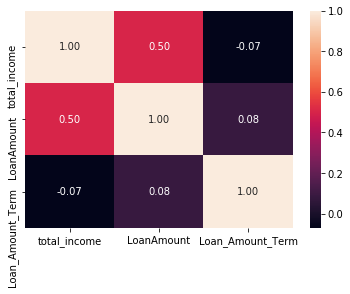

In [90]:
import matplotlib.pyplot as plt
sns.heatmap(loanDf[['total_income','LoanAmount','Loan_Amount_Term']].corr(), annot=True, fmt=".2f")
plt.show()

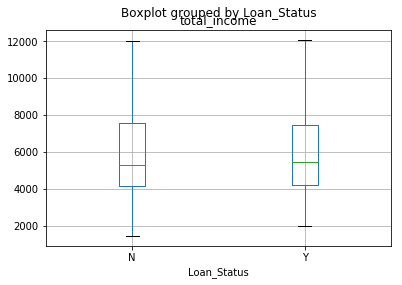

In [91]:
loanDf.boxplot(column='total_income', by='Loan_Status',showfliers=False)
plt.show()

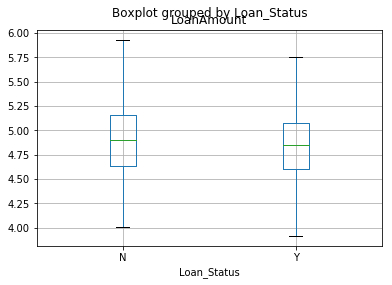

In [92]:
loanDf.boxplot(column='LoanAmount', by='Loan_Status',showfliers=False)
plt.show()

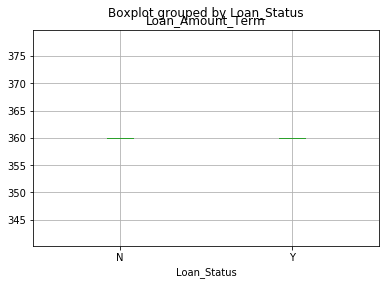

In [93]:
loanDf.boxplot(column='Loan_Amount_Term', by='Loan_Status',showfliers=False)
plt.show()

### We can see no  significance after log transformation


In [94]:
testchi.columns

Index(['total_income', 'Dependents_1', 'Married_Yes', 'Property_Area_Rural',
       'Property_Area_Semiurban', 'Credit_History_0.0', 'Credit_History_1.0'],
      dtype='object')

## Cross Validation

In [95]:
from sklearn.model_selection import cross_val_score
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(testchi,data_y, test_size=0.3, random_state=0)

clf = RandomForestClassifier(n_estimators=10, max_depth=4,random_state=0)
scores = cross_val_score(clf,X_train,y_train,cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

Accuracy: 0.81 (+/- 0.04)


In [96]:
from sklearn.utils import shuffle

data = shuffle(data)
data_X=data.drop(['Loan_Status','Loan_ID'],axis=1)
data_y=data['Loan_Status']
testchi=data_X.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Dependents_0','Dependents_3+','Dependents_2', 'Gender_Female', 'Gender_Male', 'Married_No','Education_Graduate', 'Education_Not Graduate',
       'Self_Employed_No', 'Self_Employed_Yes','Property_Area_Urban','total_income'],axis=1)


In [97]:
from sklearn.model_selection import cross_val_score
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(testchi,data_y, test_size=0.3, random_state=0)

clf = RandomForestClassifier(n_estimators=10, max_depth=3,random_state=0)
scores = cross_val_score(clf,X_train,y_train,cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

Accuracy: 0.81 (+/- 0.03)


In [98]:
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
print('Test Accuracy of Random Forest: {:.2f}'.format(clf.score(X_test, y_test)))

Test Accuracy of Random Forest: 0.81


In [99]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 21  33]
 [  3 128]]
             precision    recall  f1-score   support

          N       0.88      0.39      0.54        54
          Y       0.80      0.98      0.88       131

avg / total       0.82      0.81      0.78       185



# Results

The Accuracy of logistic regression classifier is : 82%

The Accuracy of Decision Tree is:  67.02702702702703 %

The Accuracy of Random Forest is : 82 %